In [1]:
# EDA pamages 
import pandas as pd

#hide earrings 
import warnings

warnings.filterwarnings('ignore')
import numpy as np

''' here i am importing the cleaning package and the package
    library is intended to solve the problems of
    1)Cleaning unstructured text data.
    2)Reducing noise in text.
    3)Avoid repetition of the same code for pre-processing.'''
import neattext as nfx

import datetime

#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
stemmer = PorterStemmer()

import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from textblob import TextBlob

from pandas.io.json import json_normalize

from collections import Counter 

# Data Viz pakages
import matplotlib.pyplot as plt
import seaborn as sns

#pip install wordcloud
from wordcloud import WordCloud

In [2]:
class Dataset():
    """A simple attempt to model a dog."""
    def __init__(self, df):
        """Initialize name and age attributes."""
        self.df = pd.read_csv(df)
        # the whole dataset is converted into lowercase()
    def get_lowwer(self):
        lowwer = self.df.apply(lambda x: x.astype(str).str.lower()) 
        return lowwer
    '''here i define function with two variables to get difference of previous and new columns
        afterwards i cleaned all unwantEd thkings fROM data such as below '''
    def get_clean_data_column (self,new_column_name , column_name ):
        self.df[new_column_name] = self.df[column_name].apply(nfx.remove_emojis)
        self.df[new_column_name] = self.df[new_column_name].apply(nfx.remove_numbers)
        self.df[new_column_name] = self.df[new_column_name].apply(nfx.remove_punctuations)
        self.df[new_column_name] = self.df[new_column_name].apply(nfx.remove_special_characters)
        self.df[new_column_name] = self.df[new_column_name].apply(nfx.remove_multiple_spaces)
        self.df[new_column_name] = self.df[new_column_name].apply(nfx.remove_stopwords)
        self.df[new_column_name] = self.df[new_column_name].apply(nfx.remove_urls)
        self.df[new_column_name] = self.df[new_column_name].apply(nfx.remove_visacard_addr)
        self.df[new_column_name] = self.df[new_column_name].apply(nfx.remove_terms_in_bracket)
        self.df[new_column_name] = self.df[new_column_name].apply(nfx.remove_street_address)
        self.df[new_column_name] = self.df[new_column_name].apply(nfx.remove_puncts)
        self.df[new_column_name] = self.df[new_column_name].apply(nfx.remove_postoffice_box)
        self.df[new_column_name] = self.df[new_column_name].apply(nfx.remove_phone_numbers)
        self.df[new_column_name] = self.df[new_column_name].apply(nfx.remove_html_tags)
        self.df[new_column_name] = self.df[new_column_name].apply(nfx.remove_currency_symbols)
        return self.df[new_column_name]
    
    def get_time_date(self, column_name, new_column_name_year, new_column_name_month, new_column_name_day,
                      new_column_name_hour, new_column_name_minute, new_column_name_second):
        #it is in object type to convert into datetime 
        self.df[column_name] = pd.to_datetime(self.df[column_name])
        self.df[new_column_name_year]   = self.df[column_name].dt.year
        self.df[new_column_name_month]  = self.df[column_name].dt.month
        self.df[new_column_name_day]    = self.df[column_name].dt.day
        self.df[new_column_name_hour]   = self.df[column_name].dt.hour
        self.df[new_column_name_minute] = self.df[column_name].dt.minute
        self.df[new_column_name_second] = self.df[column_name].dt.second
        
        '''here i made a function to take new_column_name 
        than remove stopwords from that 
        further it converts them into list'''
    def get_clean_list (self,new_column_name):
        clean_list = self.df[new_column_name].apply(nfx.remove_stopwords).tolist()
        return clean_list
        
    #here i made a function for tokenazation in which each sentence is going to broken into single word
    def get_token (self , function_name):
        tokens = [token for line in function_name for token in line.split()]
        return tokens
    def get_stemming(self ,input_str_for_stemming):
        '''commoner morphological and inflexional endings from words in English.
        Its main use is as part of a term normalisation process that is usually
        done when setting up Information Retrieval systems.'''
        input_str = input_str_for_stemming
        for word in input_str:
            print(stemmer.stem(word))
    def get_lemmatization(self , input_str_name):
        '''Lemmatization is the process of grouping together the different inflected forms of a word
        so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings
        context to the words. So it links words with similar meanings to one word.'''
        input_str =input_str_name 
        for i in input_str:
            a = nltk.word_tokenize(i)
            for word in a:
                print(lemmatizer.lemmatize(word))
    def get_sentiment(self,text):
        blob = TextBlob(text)
        sentiment_polarity = blob.sentiment.polarity
        sentiment_subjectivity = blob.sentiment.subjectivity
        if sentiment_polarity > 0:
            sentiment_label = 'Positive'
        elif sentiment_polarity < 0 :
            sentiment_label = 'Negative'
        else:
            sentiment_label = 'Natural'
        result = {'Polarity':sentiment_polarity,
            'Subjectivity':sentiment_subjectivity,
            'Sentiment':sentiment_label}
        return result
    def get_pnn_text(self,name_of_pnn):
        pnn_tweet = self.df[self.df['Sentiment']==name_of_pnn]['cleaning_text']
        return pnn_tweet
    '''here i made a function to take new_column_name 
    than remove stopwords from that 
    further it converts them into list'''
    def get_text_list(self,tweet_list_name):
        tweet_list_name = tweet_list_name.apply(nfx.remove_stopwords).tolist()
        return tweet_list_name
    
    def get_most_commn_words(self,docx,nums=30):
        word_tokens = Counter(docx)
        most_common = word_tokens.most_common(nums)
        result = dict(most_common)
        return result
    def get_most_common_4_df (self,words):
        most_common = self.get_most_commn_words(words)
        user_info_df = pd.DataFrame(most_common.items(),columns=['words','score'])
        return user_info_df
    
    def plot_wordcloud(self,docx):
        my_wordcloud = WordCloud().generate(docx)
        plt.imshow(my_wordcloud,interpolation='bilinear')
        plt.axis('off')
        plt.show()

In [3]:
my_dataset = Dataset("C:\\Users\\haier\\Python\\TEXT_DATA_PREPROCESSING\\Data_sets\\subset_covid19_tweets.csv")

In [4]:
my_dataset.df.dropna(inplace=True)
my_dataset.df.drop("Unnamed: 0",axis=1,inplace=True)
my_dataset.df.index.name='S:No' ; my_dataset.df.columns.name = 'Info'

In [5]:
my_dataset.df

Info,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
S:No,,,,,,,,,,,,,
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,marklaverdure,Los Angeles & Billings,I have passion for living life to it's fullest...,2011-03-04 15:17:55,10078,10316,19623,False,2020-07-25 12:11:19,@realDonaldTrump #TrumpDeathToll148K 4.2 Milli...,"['TrumpDeathToll148K', 'COVID19', 'TrumpPandem...",Twitter Web App,False
488,Dr. Alia Shah,"City of London, London",Founder & #CEO #APR360; Global Top 50 #PR & #U...,2012-06-07 09:15:55,6229,302,3177,False,2020-07-25 12:11:19,Cheap #virus-killing spray that costs pennies ...,"['virus', 'coronavirus', 'COVID19']",Twitter for Android,False
490,MMBBDomains,United States,#Political/#election/#business/#news/#arts & #...,2019-11-07 17:07:48,93,66,212,False,2020-07-25 12:11:14,#Hurricane may hit area with major #COVID19 sp...,"['Hurricane', 'COVID19']",Twitter for Android,False


In [6]:
lowwer_case_df = my_dataset.get_lowwer()

In [7]:
'''here i made a dictionary in which i gave the names of new and previous columns '''
dict_names ={'cleaning_user_name':'user_name',
             'cleaning_user_location':'user_location',
             'cleaning_user_description':'user_description',
             'cleaning_text':'text',
             'cleaning_hashtags':'hashtags',
             'cleaning_source':'source'}
#this the loop in dictionary 
for i ,j in dict_names.items():
    #here i m call my custom function to clean the dataset
    my_dataset.get_clean_data_column(i,j)

In [8]:
my_dataset.get_time_date(column_name = 'user_created', new_column_name_year = 'years', new_column_name_month = 'months',
              new_column_name_day = 'days', new_column_name_hour='hours', new_column_name_minute='minutes',
              new_column_name_second='seconds')

In [9]:
'''here i got my cleaned data after some instructions'''
my_dataset.df[['user_name','cleaning_user_name']].head()

Info,user_name,cleaning_user_name
S:No,,
2,Time4fisticuffs,Timefisticuffs
3,ethel mertz,ethel mertz
4,DIPR-J&K,DIPRJK
5,🎹 Franz Schubert,Franz Schubert
6,hr bartender,hr bartender


In [10]:
#my_dataset.df[['user_location','cleaning_user_location']]
#my_dataset.df[['user_description','cleaning_user_description']]
#my_dataset.df[['text','cleaning_text']]
#my_dataset.df[['hashtags','cleaning_hashtags']]
#my_dataset.df[['source','cleaning_source']]

In [11]:
# this is list in which each new_column_name is mentioned 
columns_list = ['cleaning_user_name',
                'cleaning_user_location',
                'cleaning_user_description',
                'cleaning_text',
                'cleaning_hashtags',
                'cleaning_source']

# this is the for loop in columns_list
for column_list in columns_list:

    # here i give some conditions for each columns 
    if column_list == 'cleaning_user_name':
        # here i call function get_clean_list in different variables
        clean_user_name_result1 = my_dataset.get_clean_list(column_list)
    elif column_list == 'cleaning_user_location':
        clean_user_loaction_result1 = my_dataset.get_clean_list(column_list)
    elif column_list == 'cleaning_user_description':
        clean_user_description_result1 = my_dataset.get_clean_list(column_list)
    elif column_list == 'cleaning_text':
        clean_text_result1 = my_dataset.get_clean_list(column_list)
    elif column_list == 'cleaning_hashtags':
        clean_hashtags_result1 = my_dataset.get_clean_list(column_list)
    elif column_list == 'cleaning_source':
        clean_source_result1 = my_dataset.get_clean_list(column_list)

In [12]:
clean_user_name_result1

['Timefisticuffs',
 'ethel mertz',
 'DIPRJK',
 'Franz Schubert',
 'hr bartender',
 'Member Christ',
 'Creativegms',
 'SEXXYLYPPS',
 'Africa Youth Advisory Board DRR',
 'Dimapur',
 'marc goovaerts',
 'CAWST',
 'Florian Bieber',
 'Blood Donors India',
 'Tetra Tech International Development',
 'beatnikgeek soothsayer',
 'Mugilan Chandrakumar',
 'VCinemas',
 'Beautify Data',
 'Alan Taylor',
 'harleyb',
 'Mr Gazz',
 'ASHP',
 'Aishling Sheridan',
 'Matthew McGee',
 'N C TA H',
 'TOI Delhi',
 'Dr K Surender Raj',
 'Barry Grodenchik',
 'CARLINO',
 '',
 'Jazmine',
 'Charles Mapundu',
 'Stephen Williams',
 'BestValueButtons',
 'Whitey',
 'InvestmentGuruIndia',
 'St Jude India ChildCare Centres',
 'IMF',
 'John Dalton',
 'Dr John Stanton ClimateEmergency ScotlandXr',
 'Cholderton Farm Shop',
 'Sales Business Coach Rakesh Sharma',
 'New Straits Times',
 'National Herald',
 'MAX',
 'Senator G Craughwell',
 'UmaDlamini',
 'ROMEO',
 'TNCoronaUpdates',
 'GAA',
 'RumpusGuy',
 'VideoChinaTV',
 'Kollywoo

In [13]:
#clean_user_loaction_result1
#clean_user_description_result1
#clean_text_result1
#clean_hashtags_result1
#clean_source_result1

In [14]:
get_token_user_name_result2 = my_dataset.get_token(clean_user_name_result1)

In [15]:
get_token_user_name_result2

['Timefisticuffs',
 'ethel',
 'mertz',
 'DIPRJK',
 'Franz',
 'Schubert',
 'hr',
 'bartender',
 'Member',
 'Christ',
 'Creativegms',
 'SEXXYLYPPS',
 'Africa',
 'Youth',
 'Advisory',
 'Board',
 'DRR',
 'Dimapur',
 'marc',
 'goovaerts',
 'CAWST',
 'Florian',
 'Bieber',
 'Blood',
 'Donors',
 'India',
 'Tetra',
 'Tech',
 'International',
 'Development',
 'beatnikgeek',
 'soothsayer',
 'Mugilan',
 'Chandrakumar',
 'VCinemas',
 'Beautify',
 'Data',
 'Alan',
 'Taylor',
 'harleyb',
 'Mr',
 'Gazz',
 'ASHP',
 'Aishling',
 'Sheridan',
 'Matthew',
 'McGee',
 'N',
 'C',
 'TA',
 'H',
 'TOI',
 'Delhi',
 'Dr',
 'K',
 'Surender',
 'Raj',
 'Barry',
 'Grodenchik',
 'CARLINO',
 'Jazmine',
 'Charles',
 'Mapundu',
 'Stephen',
 'Williams',
 'BestValueButtons',
 'Whitey',
 'InvestmentGuruIndia',
 'St',
 'Jude',
 'India',
 'ChildCare',
 'Centres',
 'IMF',
 'John',
 'Dalton',
 'Dr',
 'John',
 'Stanton',
 'ClimateEmergency',
 'ScotlandXr',
 'Cholderton',
 'Farm',
 'Shop',
 'Sales',
 'Business',
 'Coach',
 'Rakesh

In [16]:
get_token_user_loaction_result2 = my_dataset.get_token(clean_user_loaction_result1)
#get_token_user_loaction_result2
get_token_user_description_result2 = my_dataset.get_token(clean_user_description_result1)
#get_token_user_description_result2
get_token_text_result2 = my_dataset.get_token(clean_text_result1)
#get_token_text_result2
get_token_hashtags_result2 = my_dataset.get_token(clean_hashtags_result1)
#get_token_hashtags_result2
get_token_source_result2 = my_dataset.get_token(clean_source_result1)
#get_token_source_result2

In [17]:
my_dataset.get_stemming(get_token_user_name_result2)

timefisticuff
ethel
mertz
diprjk
franz
schubert
hr
bartend
member
christ
creativegm
sexxylypp
africa
youth
advisori
board
drr
dimapur
marc
goovaert
cawst
florian
bieber
blood
donor
india
tetra
tech
intern
develop
beatnikgeek
soothsay
mugilan
chandrakumar
vcinema
beautifi
data
alan
taylor
harleyb
Mr
gazz
ashp
aishl
sheridan
matthew
mcgee
N
C
TA
H
toi
delhi
Dr
K
surend
raj
barri
grodenchik
carlino
jazmin
charl
mapundu
stephen
william
bestvaluebutton
whitey
investmentguruindia
St
jude
india
childcar
centr
imf
john
dalton
Dr
john
stanton
climateemerg
scotlandxr
cholderton
farm
shop
sale
busi
coach
rakesh
sharma
new
strait
time
nation
herald
max
senat
G
craughwel
umadlamini
romeo
tncoronaupd
gaa
rumpusguy
videochinatv
kollywood
arena
habitat
human
texa
thoma
fair
adventuresbydad
Dr
miguel
escalon
franz
schubert
public
health
economi
michel
dun
jasmin
livemint
gari
keywood
ceo
salford
cv
iam
platform
jessica
roland
leicestershir
CC
siddarth
sriniva
jame
wilson
shayna
baruch
dorri
hanoitim
pc

In [18]:
#get_stemming(get_token_user_name_result2)
#get_stemming(get_token_user_description_result2)
#get_stemming(get_token_text_result2)
#get_stemming(get_token_source_result2)
#get_stemming(get_token_hashtags_result2)

In [19]:
my_dataset.get_lemmatization(get_token_user_name_result2)

Timefisticuffs
ethel
mertz
DIPRJK
Franz
Schubert
hr
bartender
Member
Christ
Creativegms
SEXXYLYPPS
Africa
Youth
Advisory
Board
DRR
Dimapur
marc
goovaerts
CAWST
Florian
Bieber
Blood
Donors
India
Tetra
Tech
International
Development
beatnikgeek
soothsayer
Mugilan
Chandrakumar
VCinemas
Beautify
Data
Alan
Taylor
harleyb
Mr
Gazz
ASHP
Aishling
Sheridan
Matthew
McGee
N
C
TA
H
TOI
Delhi
Dr
K
Surender
Raj
Barry
Grodenchik
CARLINO
Jazmine
Charles
Mapundu
Stephen
Williams
BestValueButtons
Whitey
InvestmentGuruIndia
St
Jude
India
ChildCare
Centres
IMF
John
Dalton
Dr
John
Stanton
ClimateEmergency
ScotlandXr
Cholderton
Farm
Shop
Sales
Business
Coach
Rakesh
Sharma
New
Straits
Times
National
Herald
MAX
Senator
G
Craughwell
UmaDlamini
ROMEO
TNCoronaUpdates
GAA
RumpusGuy
VideoChinaTV
Kollywood
Arena
Habitat
Humanity
Texas
Thomas
Faires
adventuresbydad
Dr
Miguel
Escalon
Franz
Schubert
Public
Health
Economy
Michelle
Dunning
Jasmine
Livemint
Gary
Keywood
CEO
Salford
CVS
IAM
Platform
Jessica
Roland
Leiceste

In [20]:
#get_lemmatization(get_token_user_loaction_result2)
#get_lemmatization(get_token_user_description_result2)
#get_lemmatization(get_token_text_result2)
#get_lemmatization(get_token_hashtags_result2)
#get_lemmatization(get_token_source_result2)

In [21]:
#test the function
exl = my_dataset.df['cleaning_text'].iloc[0]

In [22]:
my_dataset.get_sentiment(exl)

{'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentiment': 'Natural'}

In [23]:
my_dataset.df['sentiment_results'] = my_dataset.df['cleaning_text'].apply(my_dataset.get_sentiment)

In [24]:
my_dataset.df['sentiment_results']

S:No
2      {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
3      {'Polarity': 0.0, 'Subjectivity': 0.3571428571...
4      {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
5      {'Polarity': -0.6999999999999998, 'Subjectivit...
6      {'Polarity': 0.05000000000000002, 'Subjectivit...
                             ...                        
487    {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
488    {'Polarity': 0.4, 'Subjectivity': 0.7, 'Sentim...
490    {'Polarity': 0.0625, 'Subjectivity': 0.5, 'Sen...
491    {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
499    {'Polarity': 0.0, 'Subjectivity': 0.5, 'Sentim...
Name: sentiment_results, Length: 267, dtype: object

In [25]:
#to see the result of sentiment result in form of table we use this
pd.json_normalize(my_dataset.df['sentiment_results'])

,Polarity,Subjectivity,Sentiment
0,0.0000,0.000000,Natural
1,0.0000,0.357143,Natural
2,0.0000,0.000000,Natural
3,-0.7000,0.666667,Negative
4,0.0500,0.500000,Positive
...,...,...,...
262,0.0000,0.000000,Natural
263,0.4000,0.700000,Positive
264,0.0625,0.500000,Positive
265,0.0000,0.000000,Natural


In [26]:
#to join the columns of sentiment_result to dataset we use this
my_dataset.df = my_dataset.df.join(pd.json_normalize(my_dataset.df['sentiment_results']))

In [27]:
natural_text = my_dataset.get_pnn_text('Natural')

In [28]:
natural_text

S:No
2      diane wdunlap realDonaldTrump Trump claimed CO...
5      coronavirus covid deaths continue rise bad Pol...
6      COVID Change Work General recruiting specifica...
9      POPE GOD Prophet Sadhu Sundar Selvaraj Watch h...
11     Order httpstcoNUrGXEmAlogo graphicdesigner log...
                             ...                        
259    Government Tabla player countries pandemic COV...
260    everythings changing COVID RedSox start playin...
262    brilliant people awake accepting COVID mainstr...
265    feeling good Sounds like soul song COVID https...
266    EKITI COVID UPDATE July fortytwo active cases ...
Name: cleaning_text, Length: 66, dtype: object

In [29]:
negative_text = my_dataset.get_pnn_text('Negative')
positive_text = my_dataset.get_pnn_text('Positive')

In [30]:
natural_text_list = my_dataset.get_text_list(natural_text)
natural_text_list

['diane wdunlap realDonaldTrump Trump claimed COVID hoax claim effort httpstcoJkkvHWHb',
 'coronavirus covid deaths continue rise bad Politicians businesses want httpstcohXMHooXXC',
 'COVID Change Work General recruiting specifically ProactiveTalent Recruiting httpstcobjZxzGPMbK',
 'POPE GOD Prophet Sadhu Sundar Selvaraj Watch httpstcoXRTyKVji HurricaneHanna COVID httpstcodZcGUnwL',
 'Order httpstcoNUrGXEmAlogo graphicdesigner logodesign logodesinger icon minimalist Abstract httpstcoyPMoGqis',
 'PattyHajdu NavdeepSBains safe COVID safe commit ensure httpstcoaWCJoeKvC',
 'Lets protect COVIDIts real numbers climbing fast ContinentLets n httpstcobyMSfxltrw',
 'Nagaland police Covid Awareness City Tower Junction DimapurCovid keepsocialdistance httpstcoWOvFMqhuEO',
 'comprehensive review WASH amp COVIDAnalysis key ways WASH help reduce transmission httpstcoeCsfDmob',
 'KolarNeed Blood Type BpositiveAt Jalappa HospitalBlood Component Need Plasma Bve COVID recove httpstcoXtgxULcZ',
 'imagine 

In [31]:
positive_text_list = my_dataset.get_text_list(positive_text)
#positive_text_list
negative_text_list = my_dataset.get_text_list(negative_text)
#negative_text_list

In [32]:
natural_text_token = my_dataset.get_token(natural_text_list)
natural_text_token

['diane',
 'wdunlap',
 'realDonaldTrump',
 'Trump',
 'claimed',
 'COVID',
 'hoax',
 'claim',
 'effort',
 'httpstcoJkkvHWHb',
 'coronavirus',
 'covid',
 'deaths',
 'continue',
 'rise',
 'bad',
 'Politicians',
 'businesses',
 'want',
 'httpstcohXMHooXXC',
 'COVID',
 'Change',
 'Work',
 'General',
 'recruiting',
 'specifically',
 'ProactiveTalent',
 'Recruiting',
 'httpstcobjZxzGPMbK',
 'POPE',
 'GOD',
 'Prophet',
 'Sadhu',
 'Sundar',
 'Selvaraj',
 'Watch',
 'httpstcoXRTyKVji',
 'HurricaneHanna',
 'COVID',
 'httpstcodZcGUnwL',
 'Order',
 'httpstcoNUrGXEmAlogo',
 'graphicdesigner',
 'logodesign',
 'logodesinger',
 'icon',
 'minimalist',
 'Abstract',
 'httpstcoyPMoGqis',
 'PattyHajdu',
 'NavdeepSBains',
 'safe',
 'COVID',
 'safe',
 'commit',
 'ensure',
 'httpstcoaWCJoeKvC',
 'Lets',
 'protect',
 'COVIDIts',
 'real',
 'numbers',
 'climbing',
 'fast',
 'ContinentLets',
 'n',
 'httpstcobyMSfxltrw',
 'Nagaland',
 'police',
 'Covid',
 'Awareness',
 'City',
 'Tower',
 'Junction',
 'DimapurCovid',

In [33]:
positive_text_token = my_dataset.get_token(positive_text_list)
#positive_text_token
negative_text_token = my_dataset.get_token(negative_text_list)
#negative_text_token

In [34]:
natural_m_c_w = my_dataset.get_most_commn_words(natural_text_token)
natural_m_c_w

{'COVID': 42,
 'cases': 8,
 'Covid': 7,
 'coronavirus': 5,
 'covid': 5,
 'deaths': 5,
 'safe': 4,
 'reported': 4,
 'time': 4,
 'amp': 3,
 'help': 3,
 'people': 3,
 'total': 3,
 'spread': 3,
 'new': 3,
 'positive': 3,
 'Coronavirus': 3,
 'patients': 3,
 'Government': 3,
 'today': 3,
 'Trump': 2,
 'want': 2,
 'HurricaneHanna': 2,
 'Lets': 2,
 'real': 2,
 'WASH': 2,
 'update': 2,
 'countries': 2,
 'feeling': 2,
 'fight': 2}

In [35]:
negative_m_c_w = my_dataset.get_most_commn_words(negative_text_token)
#negative_m_c_w
positive_m_c_w = my_dataset.get_most_commn_words(positive_text_token)
#positive_m_c_w

In [36]:
positive_m_c_4_df = my_dataset.get_most_common_4_df(positive_m_c_w)
positive_m_c_4_df

,words,score
0,COVID,43
1,positive,6
2,cases,5
3,Covid,5
4,tested,5
5,July,4
6,countries,3
7,deaths,3
8,FoxNews,3
9,new,3


In [37]:
negative_m_c_4_df = my_dataset.get_most_common_4_df(negative_m_c_w)
#negative_m_c_4_df
natural_m_c_4_df = my_dataset.get_most_common_4_df(natural_m_c_w)
#natural_m_c_4_df

In [38]:
pos_docx = ' '.join(positive_text_token)
neg_docx = ' '.join(negative_text_token)
nat_docx = ' '.join(natural_text_token)

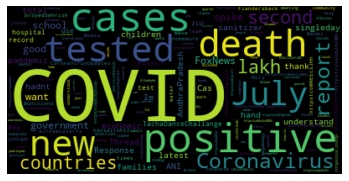

In [39]:
my_dataset.plot_wordcloud(pos_docx)#WE CALL OTHER TWOAS WELL 

In [43]:
my_dataset.df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,...,years,months,days,hours,minutes,seconds,sentiment_results,Polarity,Subjectivity,Sentiment
S:No,,,,,,,,,,,,,,,,,,,,,
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,...,2009,2,28,18,57,41,"{'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...",0.00,0.000000,Natural
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,...,2019,3,7,1,45,6,"{'Polarity': 0.0, 'Subjectivity': 0.3571428571...",-0.70,0.666667,Negative
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,...,2017,2,12,6,45,15,"{'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...",0.05,0.500000,Positive
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,...,2018,3,19,16,29,52,"{'Polarity': -0.6999999999999998, 'Subjectivit...",0.00,0.000000,Natural
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,...,2008,8,12,18,19,49,"{'Polarity': 0.05000000000000002, 'Subjectivit...",0.00,0.000000,Natural


In [42]:
my_dataset.df[['cleaning_user_name', 'cleaning_user_location',
       'cleaning_user_description', 'cleaning_text', 'cleaning_hashtags',
       'cleaning_source', 'years', 'months', 'days', 'hours', 'minutes',
       'seconds', 'user_friends', 'user_favourites', 'user_verified', 'Polarity', 'Subjectivity',
       'Sentiment']].head()

,cleaning_user_name,cleaning_user_location,cleaning_user_description,cleaning_text,cleaning_hashtags,cleaning_source,years,months,days,hours,minutes,seconds,user_friends,user_favourites,user_verified,Polarity,Subjectivity,Sentiment
S:No,,,,,,,,,,,,,,,,,,
2,Timefisticuffs,Pewee Valley KY,Christian Catholic Conservative Reagan Republi...,diane wdunlap realDonaldTrump Trump claimed CO...,COVID,Twitter Android,2009,2,28,18,57,41,9525,7254,False,0.00,0.000000,Natural
3,ethel mertz,Stuck Middle,Browns Indians ClevelandProud Cavs Resist,brookbanktv gift COVID appreciation simple thi...,COVID,Twitter iPhone,2019,3,7,1,45,6,987,1488,False,-0.70,0.666667,Negative
4,DIPRJK,Jammu Kashmir,Official Twitter handle Department Information...,July Media Bulletin Novel CoronaVirusUpdates C...,CoronaVirusUpdates COVID,Twitter Android,2017,2,12,6,45,15,168,101,False,0.05,0.500000,Positive
5,Franz Schubert,,Novorossiya STAYatHOME Polymath composer English,coronavirus covid deaths continue rise bad Pol...,coronavirus covid,Twitter Web App,2018,3,19,16,29,52,1071,1287,False,0.00,0.000000,Natural
6,hr bartender,Gainesville FL,Workplace tips advice served friendly place Co...,COVID Change Work General recruiting specifica...,COVID Recruiting,Buffer,2008,8,12,18,19,49,54810,3801,False,0.00,0.000000,Natural
